# Importing library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Comparison of different turbulence models

In [2]:
df_PySINDy = pd.read_csv("prediction_output_pysindy.csv")
df_PINNs = pd.read_csv("prediction_output_pinns.csv")
df_DNS = pd.read_csv("DNS_Data.csv")
df_kw = pd.read_csv("simulation.csv")
df_RSM = pd.read_csv("simulation.csv")

### PySINDy

In [3]:
df_PySINDy

,y^+,U,u'u',v'v',w'w',u'v'
0,0.000000,0.000000,1.835759e-34,0.000000,3.147917e-34,0.000000
1,0.199084,0.199083,1.115952e-02,0.000007,4.779634e-03,-0.000008
2,0.398168,0.398161,3.014408e-02,0.000031,1.255905e-02,-0.000044
3,0.597251,0.597223,5.804222e-02,0.000083,2.325345e-02,-0.000159
4,0.796335,0.796250,9.579167e-02,0.000171,3.676378e-02,-0.000402
...,...,...,...,...,...,...
9995,1989.842910,23.882081,3.017808e+00,0.912694,1.313606e+00,-0.572452
9996,1990.041994,23.882199,3.017655e+00,0.912644,1.313547e+00,-0.572404
9997,1990.241078,23.882317,3.017502e+00,0.912595,1.313489e+00,-0.572355
9998,1990.440162,23.882435,3.017349e+00,0.912545,1.313431e+00,-0.572307


### PINNs

In [4]:
df_PINNs

,y/delta,y^+,u_tau,nu,Re_tau,u'u'_target,v'v'_target,w'w'_target,u'v'_target,U_target,...,P_target,k_target,u'u'_pred,v'v'_pred,w'w'_pred,u'v'_pred,U_pred,dU/dy_pred,P_pred,k_pred
0,0.000000,0.000000,0.045879,0.000023,2000.0,1.835759e-34,-0.000000e+00,3.147916e-34,0.000000e+00,0.000000,...,0.000000e+00,2.491838e-34,0.005355,0.004111,-0.000169,0.002556,0.016082,0.999745,-0.004020,0.005341
1,0.000005,0.010477,0.045879,0.000023,2000.0,2.302600e-05,3.152452e-12,1.025665e-05,-1.584870e-09,0.010477,...,-3.152452e-12,1.664133e-05,0.005020,0.003970,-0.001559,0.002452,0.020744,0.999598,-0.003903,0.004287
2,0.000011,0.020954,0.045879,0.000023,2000.0,1.035261e-04,9.587862e-11,4.592480e-05,-1.808137e-08,0.020954,...,-9.587862e-11,7.472550e-05,0.004597,0.003824,-0.002816,0.002368,0.025802,0.999480,-0.003772,0.003260
3,0.000016,0.031431,0.045879,0.000023,2000.0,1.938376e-04,2.053398e-10,8.592780e-05,-3.730692e-08,0.031431,...,-2.053398e-10,1.398828e-04,0.004096,0.003680,-0.003938,0.002305,0.031277,0.999393,-0.003636,0.002270
4,0.000021,0.041908,0.045879,0.000023,2000.0,3.737199e-04,1.169478e-09,1.648834e-04,-1.179954e-07,0.041908,...,-1.169478e-09,2.693022e-04,0.003534,0.003546,-0.004921,0.002262,0.037195,0.999333,-0.003498,0.001334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189995,0.997915,1990.597290,0.045879,0.000023,2000.0,7.898694e-01,4.399690e-01,4.453149e-01,-2.060534e-03,24.395798,...,-4.399690e-01,8.375767e-01,0.793012,0.437099,0.444985,0.000293,24.398327,0.001370,-0.439276,0.837620
189996,0.997920,1990.607788,0.045879,0.000023,2000.0,7.898691e-01,4.399690e-01,4.453148e-01,-2.055342e-03,24.395798,...,-4.399690e-01,8.375764e-01,0.793013,0.437098,0.444983,0.000300,24.398333,0.001370,-0.439275,0.837619
189997,0.997925,1990.618286,0.045879,0.000023,2000.0,7.898687e-01,4.399689e-01,4.453147e-01,-2.050150e-03,24.395800,...,-4.399689e-01,8.375762e-01,0.793014,0.437097,0.444982,0.000306,24.398333,0.001370,-0.439274,0.837619
189998,0.997931,1990.628784,0.045879,0.000023,2000.0,7.898682e-01,4.399689e-01,4.453146e-01,-2.044957e-03,24.395800,...,-4.399689e-01,8.375759e-01,0.793016,0.437095,0.444981,0.000313,24.398333,0.001370,-0.439273,0.837618


### DNS

In [5]:
df_DNS = df_DNS[df_DNS["Re_tau"] == 1994.756]
df_DNS

,y/delta,y^+,U,Re_tau,u'u',v'v',w'w',u'v',P,k,dU/dy
768,0.000000,0.000000,0.000000,1994.756,1.835759e-34,-0.000000e+00,3.147917e-34,0.000000e+00,0.000000e+00,2.491838e-34,1.000000
769,0.000001,0.002428,0.002428,1994.756,1.102624e-06,6.103635e-15,4.922083e-07,-1.525933e-11,-6.103635e-15,7.974160e-07,0.999999
770,0.000006,0.012141,0.012141,1994.756,2.755853e-05,3.802941e-12,1.227540e-05,-1.909378e-09,-3.802941e-12,1.991697e-05,0.999994
771,0.000017,0.033995,0.033995,1994.756,2.159370e-04,2.321251e-10,9.571660e-05,-4.201144e-08,-2.321251e-10,1.558269e-04,0.999983
772,0.000037,0.072846,0.072845,1994.756,9.905815e-04,4.834114e-09,4.352952e-04,-4.150592e-07,-4.834114e-09,7.129408e-04,0.999963
...,...,...,...,...,...,...,...,...,...,...,...
1147,0.981425,1957.703001,24.393055,1994.756,7.929639e-01,4.404069e-01,4.463265e-01,-1.840350e-02,-4.404069e-01,8.398487e-01,0.000150
1148,0.985552,1965.936430,24.394150,1994.756,7.917362e-01,4.402281e-01,4.459160e-01,-1.429979e-02,-4.402281e-01,8.389401e-01,0.000116
1149,0.989680,1974.170350,24.394972,1994.756,7.908117e-01,4.400968e-01,4.456111e-01,-1.020632e-02,-4.400968e-01,8.382598e-01,0.000083
1150,0.993808,1982.404621,24.395523,1994.756,7.901871e-01,4.400110e-01,4.454122e-01,-6.120674e-03,-4.400110e-01,8.378052e-01,0.000050


### RSM

In [6]:
df_RSM["u'u'"] = df_RSM["uu (y^+) RST"]
df_RSM["v'v'"] = df_RSM["vv (y^+)"]
df_RSM["u'v'"] = df_RSM["uv RST (y^+)"]
df_RSM = df_RSM[["y^+","U","u'u'","v'v'","u'v'"]]
df_RSM

,y^+,U,u'u',v'v',u'v'
0,0.00,0.770575,2.452194,0.626119,-0.545156
1,0.00,1.467345,1.515711,0.506281,-0.315505
2,0.01,2.344969,1.585571,0.514827,-0.363108
3,0.03,3.216663,2.008975,0.574606,-0.483729
4,0.07,4.015537,2.461605,0.634632,-0.599876
...,...,...,...,...,...
379,1957.70,20.817419,0.984347,0.360370,-0.009441
380,1965.94,20.817528,0.984161,0.360329,-0.006745
381,1974.17,20.817572,0.984042,0.360304,-0.004050
382,1982.40,20.817594,0.983976,0.360293,-0.001355


### K - ω

In [7]:
df_kw["U"] = df_kw["U k-w"]
df_kw = df_kw[["y^+","U"]]
df_kw

,y^+,U
0,0.00,1.010207
1,0.00,2.169057
2,0.01,3.481841
3,0.03,4.907131
4,0.07,6.336764
...,...,...
379,1957.70,23.705228
380,1965.94,23.705446
381,1974.17,23.705446
382,1982.40,23.705446


In [8]:
def display_plots(df_PySINDy=None, df_PINNs=None, df_DNS=None, df_RSM=None, df_kw=None):
    """
    Plot the predicted values from multiple turbulence models.
    
    Args:
        df_PySINDy (pd.DataFrame): The dataframe containing PySINDy results
        df_PINNs (pd.DataFrame): The dataframe containing PINNs results
        df_DNS (pd.DataFrame): The dataframe containing the DNS data
        df_RSM (pd.DataFrame): The dataframe containing RSM results
        df_kw (pd.DataFrame): The dataframe containing k-w results
        
    Returns:
        None
    """
    # Define the names of the columns to be plotted
    col = ["U","u'u'","v'v'","w'w'","u'v'"]

    for i in range(5):
        plt.figure(figsize=(12, 6))

        # For U, include data from the k-w model  
        if col[i] == "U":
            if df_kw is not None:
                kw = df_kw[col[i]]
                y_kw = df_kw["y^+"]
        
        # Retrieve data from the DNS model if available
        if df_DNS is not None:
            dns = df_DNS[col[i]]
            y_dns = df_DNS["y^+"]
        
        # Except for w'w', include data from the RSM model
        if col[i] != "w'w'":
            if df_RSM is not None:
                rsm = df_RSM[col[i]]
                y_rsm = df_RSM["y^+"]
        
        # Retrieve data from the PySINDy model (Oden) if available
        if df_PySINDy is not None:
            pysindy = df_PySINDy[col[i]]
            y_pysindy = df_PySINDy["y^+"]
        
        # Retrieve data from the PINNs model (Oden) if available
        if df_PINNs is not None:
            pinns = df_PINNs[f"{col[i]}_pred"]
            y_pinns = df_PINNs["y^+"]
        

        if col[i] == "u'v'":
            if df_DNS is not None:
                dns = -1 * df_DNS[col[i]] 
            if df_PySINDy is not None:
                pysindy = -1 * df_PySINDy[col[i]]
            if df_RSM is not None:
                rsm = -1 * df_RSM[col[i]]
            if df_PINNs is not None:
                pinns = -1 * df_PINNs[f"{col[i]}_pred"]
        
        # Plot data for each model if available
        if df_PySINDy is not None:
            plt.plot(y_pysindy.values, pysindy.values,linestyle="-",color="green",label = f"{col[i]} (PySINDy)")
        if df_PINNs is not None:
            plt.plot(y_pinns.values, pinns.values,linestyle="-",color="blue",label = f"{col[i]} (PINNs)")
        if df_DNS is not None:
            plt.plot(y_dns.values, dns.values,linestyle="--",color="red" ,label=f"{col[i]} (DNS)")
        if col[i] != "w'w'":
            if df_RSM is not None:
                plt.plot(y_rsm.values, rsm.values,linestyle="-",color="black" ,label=f"{col[i]} (RSM)")
        if col[i] == "U":
            if df_kw is not None:
                plt.plot(y_kw.values, kw.values,linestyle="-",color="orange" ,label=f"{col[i]} (k–ω)")

        plt.xscale('log')
        plt.grid(True, which="both", linestyle='--', linewidth=0.5)
        plt.xlabel('y^+')

        if col[i] == "u'v'":
            plt.ylabel(f"- {col[i]}")
            plt.title(f"- {col[i]} as a function of y^+")
        else:
            plt.ylabel(col[i])
            plt.title(f"{col[i]} as a function of y^+")


        plt.legend()
        plt.plot()

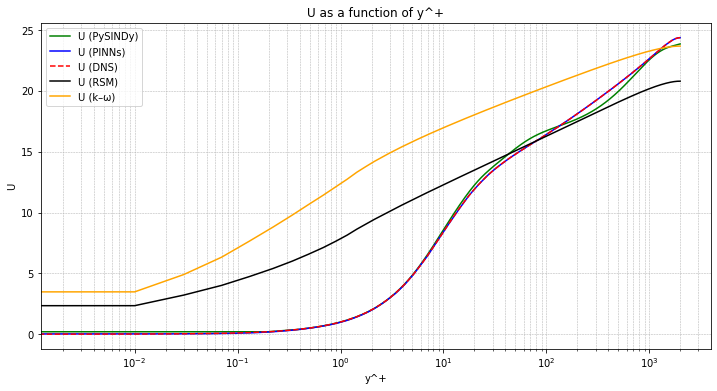

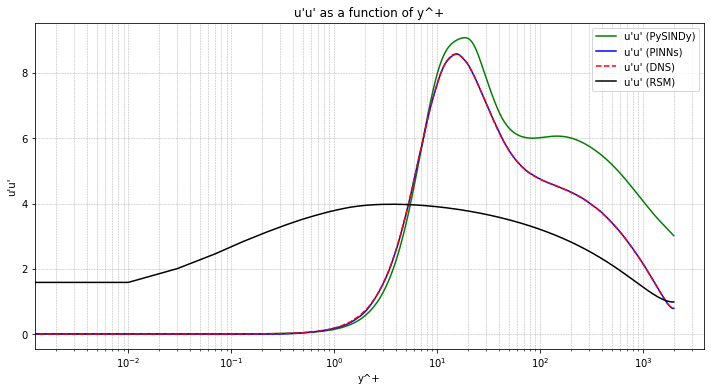

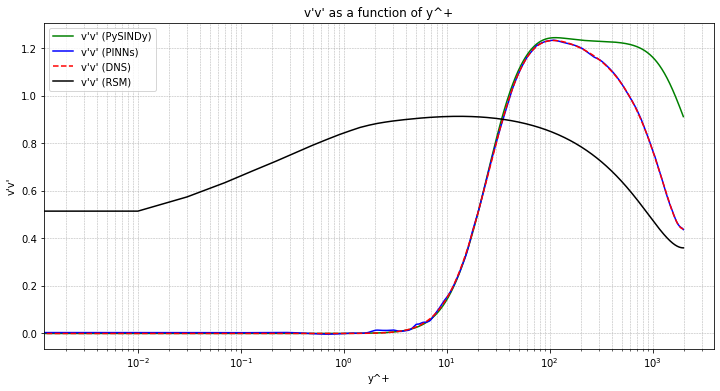

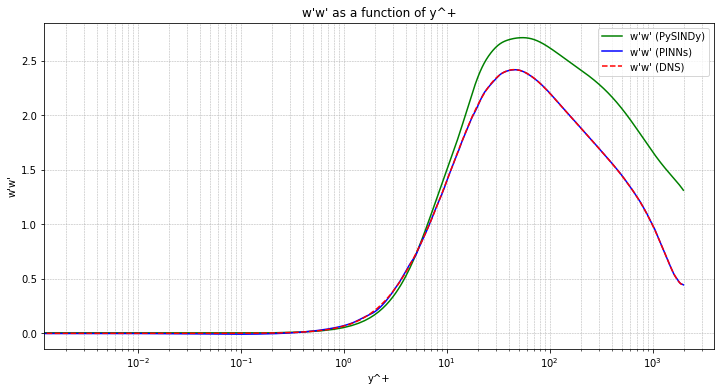

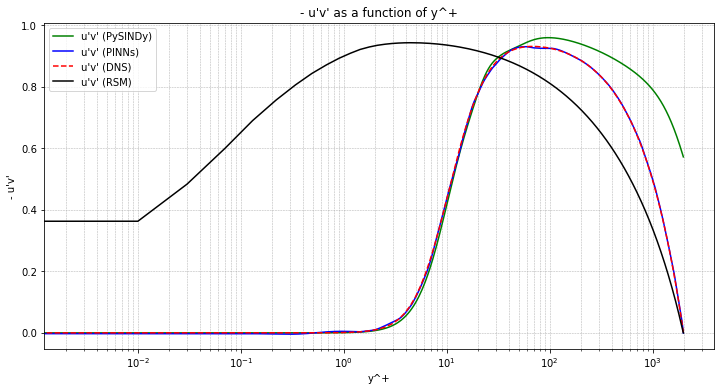

In [9]:
display_plots(df_PySINDy=df_PySINDy, df_PINNs=df_PINNs, df_DNS=df_DNS, df_RSM=df_RSM, df_kw=df_kw)